In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plataformas_df = pd.read_csv('streaming.csv')

In [11]:
plataformas_df.shape

(22998, 17)

Valores Nulos , verificaremos en el modelo las variables relevantes para eliminar o imputar los valores 

In [7]:
plataformas_df.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration_int         0
duration_type      482
listed_in            0
description          4
userId               0
score                0
timestamp            0
mean_score           0
dtype: int64

In [12]:
plataformas_df.head(3)

,id,type,title,director,cast,country,date_added,release_year,rating,duration_int,duration_type,listed_in,description,userId,score,timestamp,mean_score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113,min,"comedy, drama",a small fishing village must procure a local d...,543,5.0,1059596582,3.467131
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110,min,"drama, international",a metro family decides to fight a cyber crimin...,321,3.0,1181451581,3.548682
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,74,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,582,5.0,1316843370,3.500000


In [13]:
plataformas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration_int   22998 non-null  int64  
 10  duration_type  22516 non-null  object 
 11  listed_in      22998 non-null  object 
 12  description    22994 non-null  object 
 13  userId         22998 non-null  int64  
 14  score          22998 non-null  float64
 15  timestamp      22998 non-null  int64  
 16  mean_score     22998 non-null  float64
dtypes: float64(2), int64(4), object(11)
memory usage: 

Verificamos la distribucion de los score

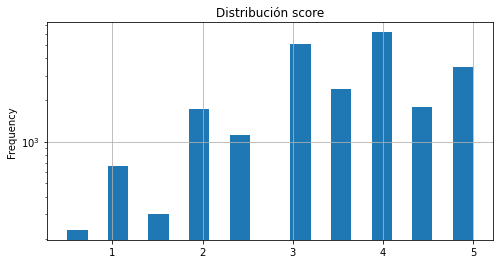

In [23]:
plt.figure(figsize = (8,4))
plataformas_df['score'].plot.hist(log=True, bins = 20)
plt.title('Distribución score')
plt.grid()
plt.show()

Verificamos correlacion de variables, para revisar redundancias entre variables explicativas

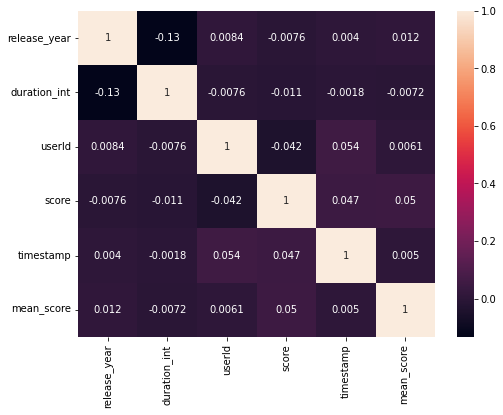

In [20]:
corr = plataformas_df.corr ()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.show()


Graficamos pairplot para verificar relaciones entre las variables cuantitativas del dataframe , que nos permite elegir las mejores variables predictoras para nuestro modelo

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  func(x=vector, **plot_kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpre

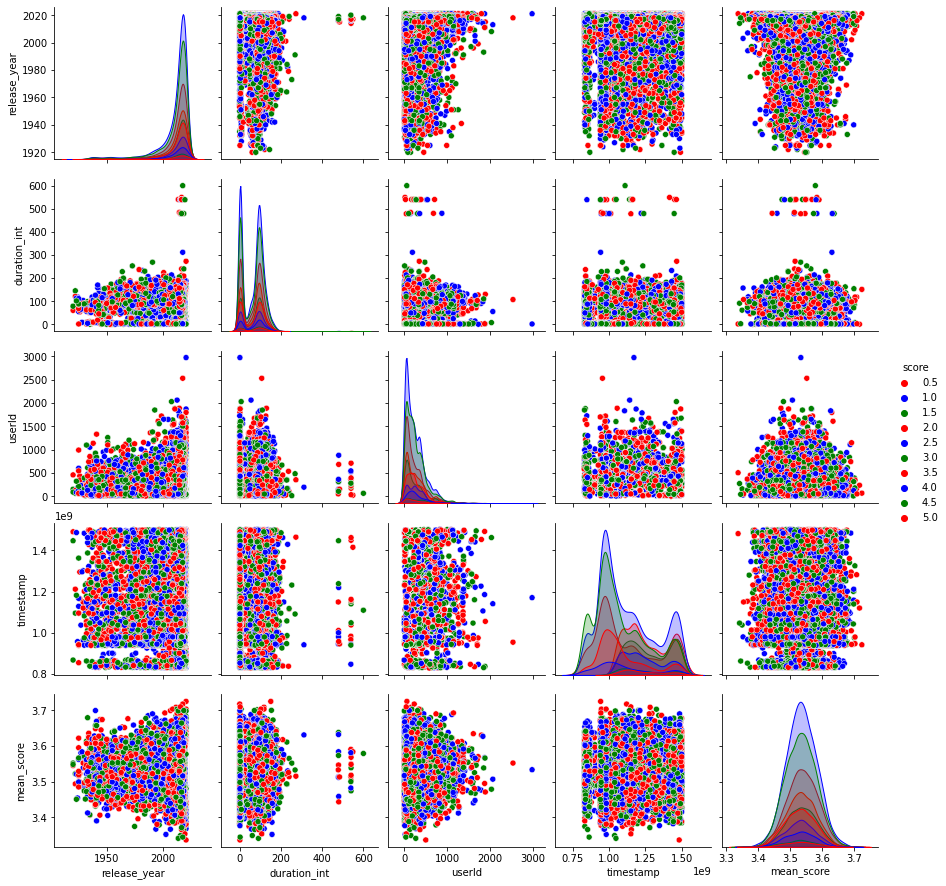

In [21]:
sns.pairplot(plataformas_df, hue="score", palette = ['r', 'b', 'g'])
plt.show()

BOXPLOT OUTLIERS , variable score

<AxesSubplot: xlabel='score'>

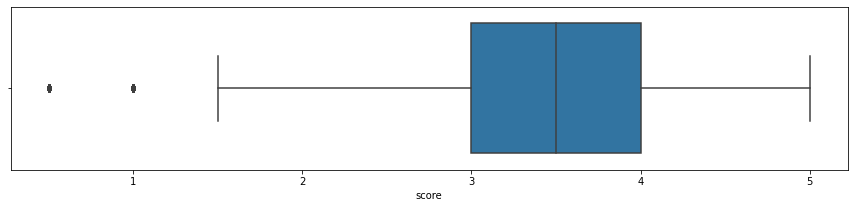

In [9]:
#Gráfico comportamiento outliers variable score

plt.subplots(figsize=(15,3))
sns.boxplot(x=plataformas_df[~plataformas_df['score'].isna()]['score'])

Contenido mas popular

In [10]:
score = plataformas_df.loc[:,('score','title')]
score

#max_consumo = europa.loc[europa.Solar_Generation_TWh.idxmax()]['Year']

,score,title
0,5.0,the grand seduction
1,3.0,take care good night
2,5.0,secrets of deception
3,1.5,pink: staying true
4,5.0,monster maker
...,...,...
22993,4.0,zodiac
22994,1.0,zombie dumb
22995,4.0,zombieland
22996,5.0,zoom
